Autor: William Liaw ([@willfliaw](https://github.com/willfliaw), NUSP: 11834011).

Relatório acadêmico apresentado à Escola Politécnica da Universidade de São Paulo como atividade da Disciplina Introdução à Ciência de Dados para Engenheiros (PME3573).

Este documento é componente da atividade [E02 - BH-3 Ensaio de decaimento em ar](https://github.com/willfliaw/PME3573/tree/main/E02), do repositório [PME3573](https://github.com/willfliaw/PME3573/). Recomenda-se a leitura dos arquivos `README.md` do repositório, e `README.md` específico da atividade, para melhor noção do contexto em que se insere este trabalho acadêmico, dentre outros detalhes preliminares. Além disso, **recomenda-se fortemente** a leitura deste documento em sua versão `.ipynb`, no [GitHub](https://github.com/willfliaw/PME3573/blob/main/E02/E02-William%20Liaw.ipynb), uma vez que lá é possível visualizar em melhor definição as tabelas e gráficos.

Nas seções seguintes, pode-se examinar o código utilizado para a tabulação dos dados.

# Dados experimentais

| Arquivo                                         |
|:-----------------------------------------------:|
| `./dataBH3/BH_03_AIR_1.csv`                        |

Ao longo deste trabalho, apelidará-se este banco de dados de **BH3**.

# Configurações de ambiente

## Estrutura do diretório

Antes de executar quaisquer células de código, a estrutura do diretório é como a seguir:

```
E02/
├── data/
│   └── BH_03_AIR_1.csv
├── E02 - BH-3 Ensaio de decaimento em ar.pdf
├── E02-William Liaw.ipynb
├── E02-William Liaw.pdf
└── README.md
```

## Importando bibliotecas

In [1]:
options(tidyverse.quiet = TRUE)
library(ggplot2)
library(pls, warn.conflicts = FALSE)

## Leitura de dados

In [2]:
dataBH3 <- read.table("./data/BH_03_AIR_1.csv", header = TRUE, sep = "\t")

## Hiperparâmetros

In [3]:
frames.forward = 20

# Análise preliminar

In [4]:
head(dataBH3)

,Frame,Time,A01.X,A01.Y,A01.Z,A02.X,A02.Y,A02.Z,A03.X,A03.Y,...,M56.Z,L01.X,L01.Y,L01.Z,L02.X,L02.Y,L02.Z,L03.X,L03.Y,L03.Z
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00,322.989,-187.229,-2600.661,324.028,-188.155,-2556.975,324.272,-189.057,...,299.587,266.659,-223.609,358.285,244.941,-228.247,438.436,232.766,-231.119,519.751
2,2,0.01,322.893,-187.220,-2600.629,324.130,-188.167,-2557.007,324.204,-189.037,...,301.286,271.653,-222.588,359.928,244.789,-228.289,438.395,227.291,-232.160,517.794
3,3,0.02,323.079,-187.218,-2600.665,324.068,-188.240,-2556.994,324.320,-189.019,...,301.301,271.648,-222.613,359.926,244.647,-228.288,438.371,227.202,-232.180,517.791
4,4,0.03,322.884,-187.219,-2600.632,324.176,-188.111,-2557.008,324.331,-189.020,...,301.267,271.645,-222.571,359.931,250.474,-227.275,440.166,232.759,-231.136,519.737
5,5,0.04,322.653,-187.326,-2600.813,324.009,-188.237,-2557.238,324.259,-189.157,...,301.101,271.360,-222.680,359.714,250.106,-227.439,439.887,232.597,-231.252,519.511
6,6,0.05,322.525,-187.361,-2600.855,323.760,-188.271,-2557.213,324.024,-189.174,...,301.027,271.367,-222.743,359.648,250.049,-227.444,439.850,232.396,-231.306,519.412


In [5]:
class(dataBH3)

[1] "data.frame"

In [6]:
names(dataBH3)

[1] "Frame" "Time"  "A01.X" "A01.Y" "A01.Z" "A02.X" "A02.Y" "A02.Z" "A03.X"
 [10] "A03.Y" "A03.Z" "M01.X" "M01.Y" "M01.Z" "M02.X" "M02.Y" "M02.Z" "M03.X"
 [19] "M03.Y" "M03.Z" "M04.X" "M04.Y" "M04.Z" "M05.X" "M05.Y" "M05.Z" "M06.X"
 [28] "M06.Y" "M06.Z" "M07.X" "M07.Y" "M07.Z" "M08.X" "M08.Y" "M08.Z" "M09.X"
 [37] "M09.Y" "M09.Z" "M10.X" "M10.Y" "M10.Z" "M11.X" "M11.Y" "M11.Z" "M12.X"
 [46] "M12.Y" "M12.Z" "M13.X" "M13.Y" "M13.Z" "M14.X" "M14.Y" "M14.Z" "M15.X"
 [55] "M15.Y" "M15.Z" "M16.X" "M16.Y" "M16.Z" "M17.X" "M17.Y" "M17.Z" "M18.X"
 [64] "M18.Y" "M18.Z" "M19.X" "M19.Y" "M19.Z" "M20.X" "M20.Y" "M20.Z" "M21.X"
 [73] "M21.Y" "M21.Z" "M22.X" "M22.Y" "M22.Z" "M23.X" "M23.Y" "M23.Z" "M24.X"
 [82] "M24.Y" "M24.Z" "M25.X" "M25.Y" "M25.Z" "M26.X" "M26.Y" "M26.Z" "M27.X"
 [91] "M27.Y" "M27.Z" "M28.X" "M28.Y" "M28.Z" "M29.X" "M29.Y" "M29.Z" "M30.X"
[100] "M30.Y" "M30.Z" "M31.X" "M31.Y" "M31.Z" "M32.X" "M32.Y" "M32.Z" "M33.X"
[109] "M33.Y" "M33.Z" "M34.X" "M34.Y" "M34.Z" "M35.X" "M35.Y" "M35.Z" "M36.X"
[118] "M36.Y" "M36.Z" "M37.X" "M37.Y" "M37.Z" "M38.X" "M38.Y" "M38.Z" "M39.X"
[127] "M39.Y" "M39.Z" "M40.X" "M40.Y" "M40.Z" "M41.X" "M41.Y" "M41.Z" "M42.X"
[136] "M42.Y" "M42.Z" "M43.X" "M43.Y" "M43.Z" "M44.X" "M44.Y" "M44.Z" "M45.X"
[145] "M45.Y" "M45.Z" "M46.X" "M46.Y" "M46.Z" "M47.X" "M47.Y" "M47.Z" "M48.X"
[154] "M48.Y" "M48.Z" "M49.X" "M49.Y" "M49.Z" "M50.X" "M50.Y" "M50.Z" "M51.X"
[163] "M51.Y" "M51.Z" "M52.X" "M52.Y" "M52.Z" "M53.X" "M53.Y" "M53.Z" "M54.X"
[172] "M54.Y" "M54.Z" "M55.X" "M55.Y" "M55.Z" "M56.X" "M56.Y" "M56.Z" "L01.X"
[181] "L01.Y" "L01.Z" "L02.X" "L02.Y" "L02.Z" "L03.X" "L03.Y" "L03.Z"

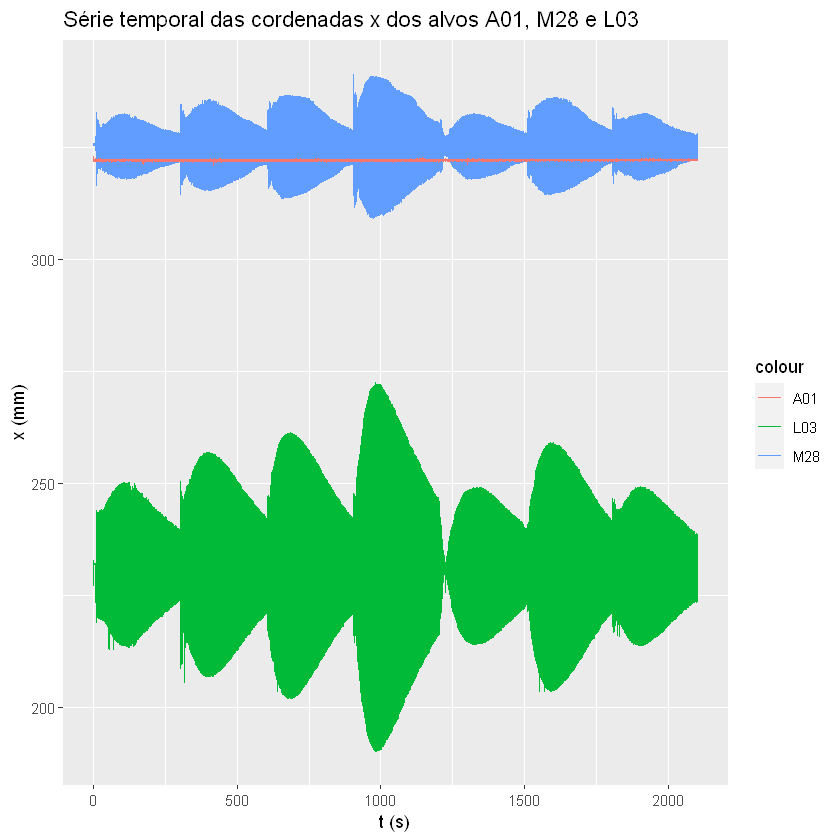

In [7]:
ggplot(dataBH3) +
  geom_line(aes(x = Time, y = L03.X, color = "L03"), linewidth = 0.10) +
  geom_line(aes(x = Time, y = M28.X, color = "M28"), linewidth = 0.15) +
  geom_line(aes(x = Time, y = A01.X, color = "A01"), linewidth = 0.20) +
  labs(x = "t (s)", y = "x (mm)", title = "Série temporal das cordenadas x dos alvos A01, M28 e L03")

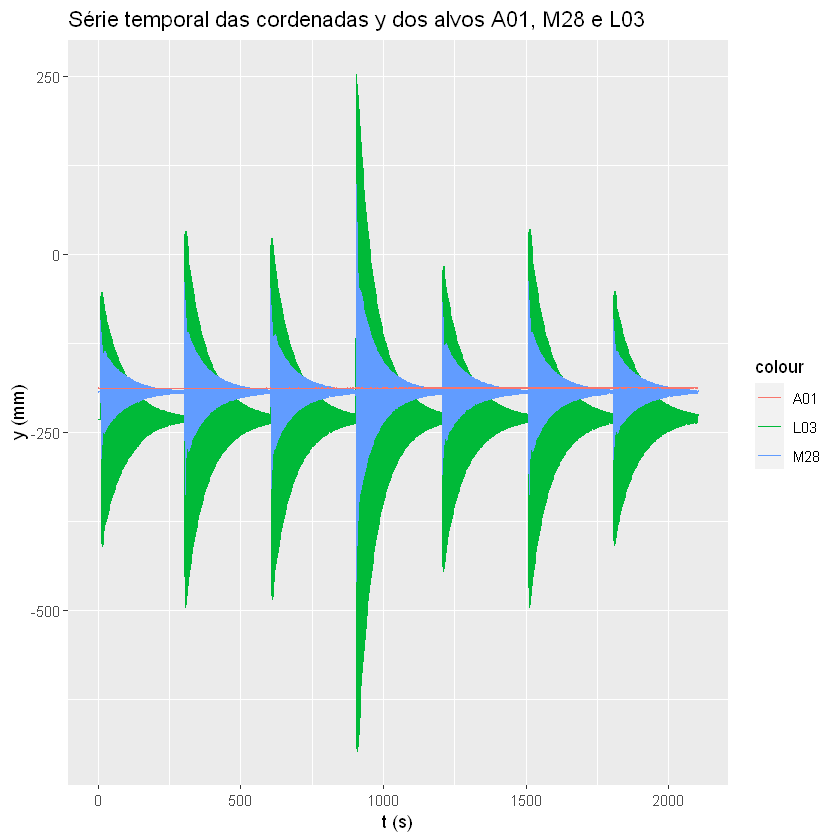

In [8]:
ggplot(dataBH3) +
  geom_line(aes(x = Time, y = L03.Y, color = "L03"), linewidth = 0.10) +
  geom_line(aes(x = Time, y = M28.Y, color = "M28"), linewidth = 0.15) +
  geom_line(aes(x = Time, y = A01.Y, color = "A01"), linewidth = 0.20) +
  labs(x = "t (s)", y = "y (mm)", title = "Série temporal das cordenadas y dos alvos A01, M28 e L03")

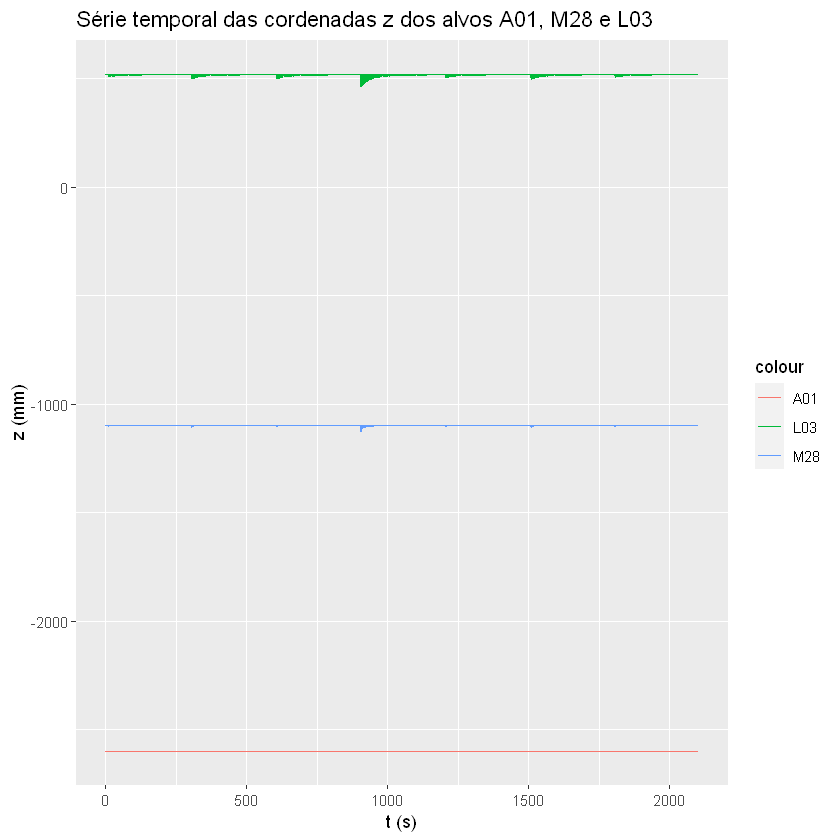

In [9]:
ggplot(dataBH3) +
  geom_line(aes(x = Time, y = L03.Z, color = "L03"), linewidth = 0.10) +
  geom_line(aes(x = Time, y = M28.Z, color = "M28"), linewidth = 0.15) +
  geom_line(aes(x = Time, y = A01.Z, color = "A01"), linewidth = 0.20) +
  labs(x = "t (s)", y = "z (mm)", title = "Série temporal das cordenadas z dos alvos A01, M28 e L03")

# Parte 1

Conjunto de treino simples (sem validação cruzada).

In [10]:
n.t = 50000
TrainingSet = 1:n.t

In [11]:
x.t <- as.matrix(cbind(dataBH3[TrainingSet[-n.t], !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[TrainingSet[-1], !colnames(dataBH3) %in% c("Frame", "Time")]))
y.t <- dataBH3[TrainingSet[-n.t] + frames.forward, "L03.Y"]

## a. Regressão Linear Multivariada (MLR)

In [12]:
L03.Y.r <- lm(y.t ~ x.t)

In [13]:
coef <- summary(L03.Y.r)$coefficients[, "Estimate"]

L03.Y.p <- as.matrix(cbind(dataBH3[1:(nrow(dataBH3) - frames.forward), !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[1:(nrow(dataBH3) - frames.forward) + 1L, !colnames(dataBH3) %in% c("Frame", "Time")]))%*%coef[-1] + coef[1]
L03.Y.e <- (dataBH3[(1 + frames.forward):nrow(dataBH3), "L03.Y"] - L03.Y.p)

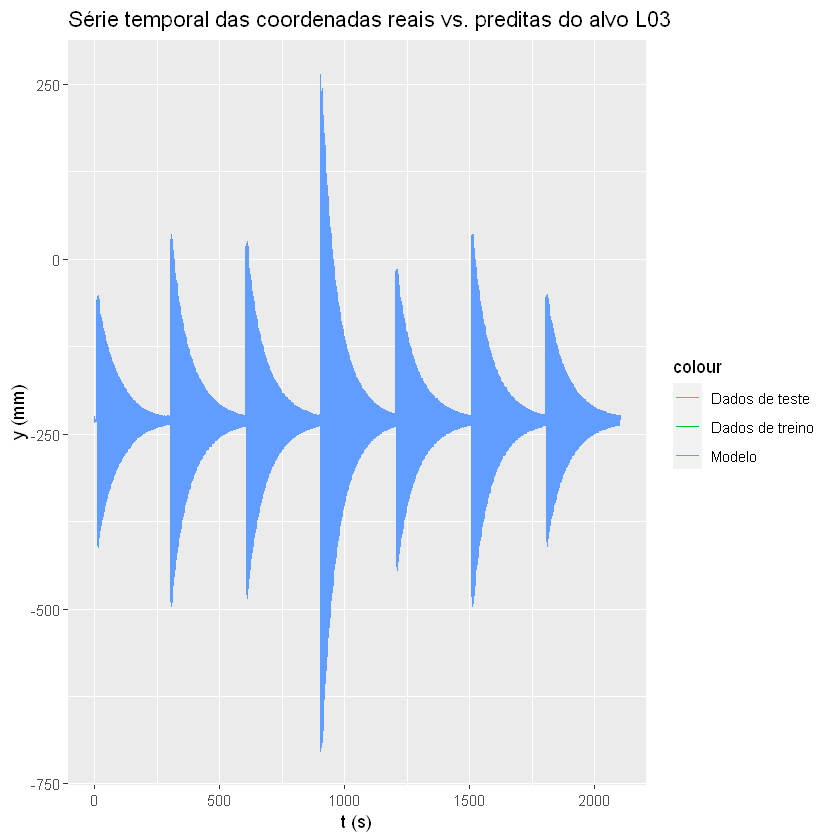

In [14]:
ggplot() +
   geom_line(aes(x = dataBH3$Time[TrainingSet], y = dataBH3[TrainingSet, "L03.Y"], color = "Dados de treino"), linewidth = 0.15) +
   geom_line(aes(x = dataBH3$Time[-TrainingSet], y = dataBH3[-TrainingSet, "L03.Y"], color = "Dados de teste"), linewidth = 0.12) +
   geom_line(aes(x = dataBH3$Time[(1 + frames.forward):nrow(dataBH3)], y = L03.Y.p, color = "Modelo"), linewidth = 0.10) +
   labs(x = "t (s)", y = "y (mm)", title = "Série temporal das coordenadas reais vs. preditas do alvo L03")

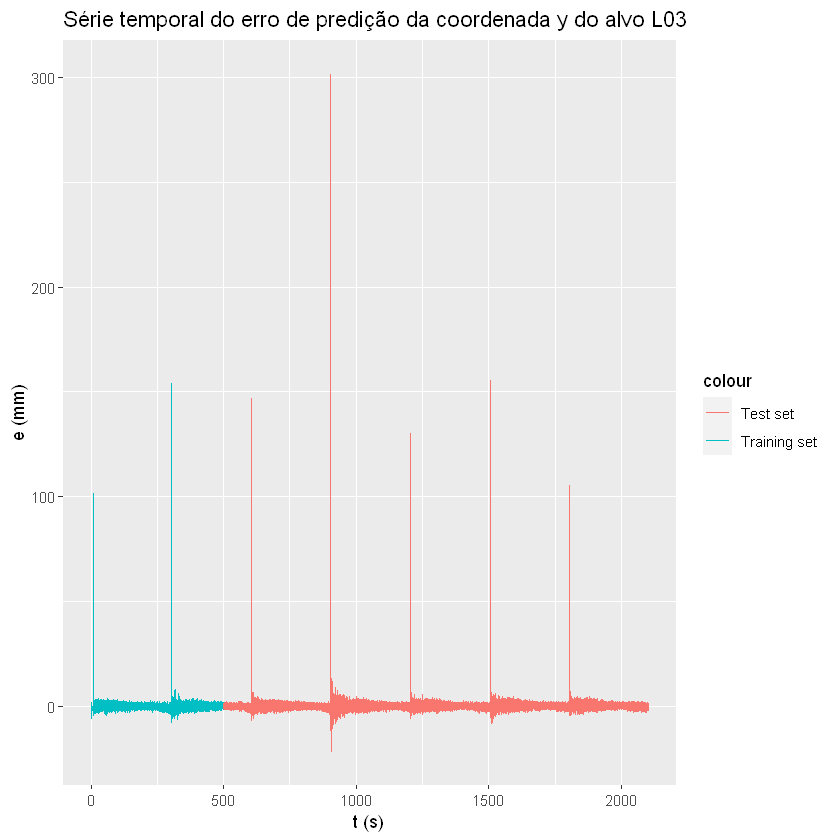

In [15]:
ggplot() +
  geom_line(aes(x = dataBH3$Time[TrainingSet + frames.forward], y = L03.Y.e[TrainingSet], color = "Training set"), linewidth = 0.10) +
  geom_line(aes(x = dataBH3$Time[(n.t + 1 + frames.forward):nrow(dataBH3)], y = L03.Y.e[-TrainingSet], color = "Test set"), linewidth = 0.10) +
  labs(x = "t (s)", y = "e (mm)", title = "Série temporal do erro de predição da coordenada y do alvo L03")

Nota-se que o erro apresenta 7 picos, de ordem de grandeza muito superior àquela do erro médio. Infere-se que esses picos coincidem com os instantes em que se fornece estímulos externos, impactos ao sistema. É natural e esperado que o modelo não seja capaz de prever a coordenada y do alvo refletivo L03 aceitavelmente nesses instantes, pois os impactos não foram incorporados na modelagem feita, a qual utiliza informações decorrentes dos instantes $n$ e $n+1$, como posição e velocidade.

Para além dos 7 picos, a ordem de grandeza do erro, no geral, é cerca de poucos milímetros, o que se considera um resultado apreciável.

## b. Método recursivo de mínimos quadrados (RLS)

1. $z_{k+1} \gets P_{k} \phi(x^{(k+1)})$
2. $\gamma_{k+1} \gets \frac{1}{\phi(x^{(k+1)})^* z_{k+1} + \sigma_{k+1}^2}$
3. $\theta_{k+1} \gets \theta_{k} + \gamma_{k+1} \big( {y^{(k+1)} -  \phi(x^{(k+1)})^* \theta_k } \big) z_{k+1}$
4. $P_{k+1} \gets P_{k} - \gamma_{k+1} z_{k+1} z_{k+1}^*$

In [16]:
phi <- cbind(matrix(1L, nrow = nrow(x.t)), x.t)
P0 <- diag(ncol(x.t) + 1) # m×m
theta0 <- matrix(1e-2L, nrow = ncol(x.t) + 1) # m

In [17]:
z <- P0%*%phi[1,]
gamma <- 1/(t(phi[1,])%*%z + 1)[1]
theta <- theta0 + gamma*(y.t[1] - t(phi[1,])%*%theta0)[1]*z
P <- P0 - gamma*z%*%t(z)

for (k in 1:(n.t - 2)) {
  z <- P%*%phi[k + 1,]
  gamma <- 1/(t(phi[k + 1,])%*%z + 1)[1]
  theta <- theta + gamma*(y.t[k + 1] - t(phi[k + 1,])%*%theta)[1]*z
  P <- P - gamma*z%*%t(z)
}

rm(phi, P0, theta0, z, gamma, P)

In [18]:
L03.Y.p <- as.matrix(cbind(dataBH3[1:(nrow(dataBH3) - frames.forward), !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[1:(nrow(dataBH3) - frames.forward) + 1, !colnames(dataBH3) %in% c("Frame", "Time")]))%*%theta[-1] + theta[1]
L03.Y.e <- (dataBH3[(1 + frames.forward):nrow(dataBH3), "L03.Y"] - L03.Y.p)

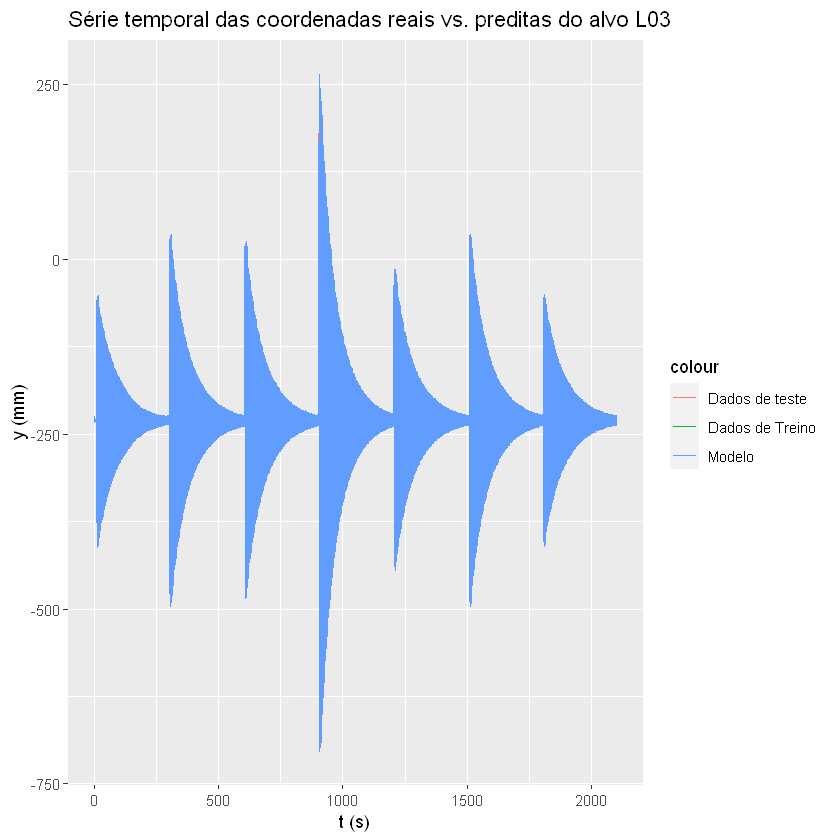

In [19]:
ggplot() +
   geom_line(aes(x = dataBH3$Time[TrainingSet], y = dataBH3[TrainingSet, "L03.Y"], color = "Dados de Treino"), linewidth = 0.15) +
   geom_line(aes(x = dataBH3$Time[-TrainingSet], y = dataBH3[-TrainingSet, "L03.Y"], color = "Dados de teste"), linewidth = 0.12) +
   geom_line(aes(x = dataBH3$Time[(1 + frames.forward):nrow(dataBH3)], y = L03.Y.p, color = "Modelo"), linewidth = 0.10) +
   labs(x = "t (s)", y = "y (mm)", title = "Série temporal das coordenadas reais vs. preditas do alvo L03")

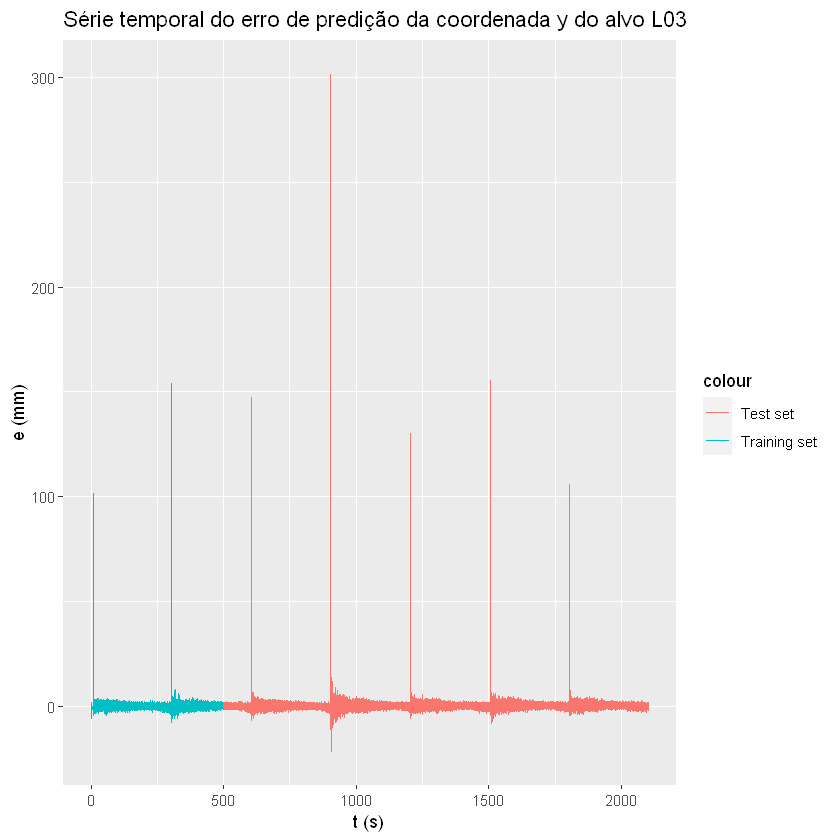

In [20]:
ggplot() +
  geom_line(aes(x = dataBH3$Time[TrainingSet + frames.forward], y = L03.Y.e[TrainingSet], color = "Training set"), linewidth = 0.10) +
  geom_line(aes(x = dataBH3$Time[(n.t + 1 + frames.forward):nrow(dataBH3)], y = L03.Y.e[-TrainingSet], color = "Test set"), linewidth = 0.10) +
  labs(x = "t (s)", y = "e (mm)", title = "Série temporal do erro de predição da coordenada y do alvo L03")

Analogamente ao item a.: o erro apresenta 7 picos, de ordem de grandeza muito superior àquela do erro médio. Infere-se que esses picos coincidem com os instantes em que se fornece estímulos externos, impactos ao sistema. É natural e esperado que o modelo não seja capaz de prever a coordenada y do alvo refletivo L03 aceitavelmente nesses instantes, pois os impactos não foram incorporados na modelagem feita, a qual utiliza informações decorrentes dos instantes $n$ e $n+1$, como posição e velocidade.

Para além dos 7 picos, a ordem de grandeza do erro, no geral, é cerca de poucos milímetros, o que se considera um resultado apreciável.

In [21]:
coefs <- cbind(coef, theta)
colnames(coefs) <- c("MLR", "RLS")

head(coefs)

,MLR,RLS
(Intercept),-1.309705e+03,0.008329324
x.tA01.X,-4.266303e-01,-0.411316325
x.tA01.Y,3.505316e-02,-0.015762368
x.tA01.Z,-3.619487e-01,-0.282309667
x.tA02.X,4.472529e-01,0.444140561
x.tA02.Y,3.159419e-01,0.309058925


In [22]:
rm(coefs)

Constata-se diferença mínima entre os coeficientes advindos dos métodos MLR e RLS.

# Parte 2

Normalização dos dados:

In [23]:
ColRange <- grep("X|Y|Z", names(dataBH3))
A. <- max(abs(dataBH3$L03.Y - mean(dataBH3$L03.Y)))
mean_vec <- c()

for (col in ColRange){
  m. <- mean(dataBH3[, col])
  dataBH3[,col] <- ((dataBH3[, col] - m.)/A.)
  mean_vec <- c(mean_vec, m.)
}

rm(ColRange, A., m.)

Subconjuntos para validação cruzada:

In [24]:
subsets <- list(3000:27000, 33000:57000, 63000:87000, 93000:117000, 123000:147000, 153000:177000, 183000:207000)

In [25]:
subsets.all <- c(subsets[[1]], subsets[[2]], subsets[[3]], subsets[[4]], subsets[[5]], subsets[[6]], subsets[[7]])

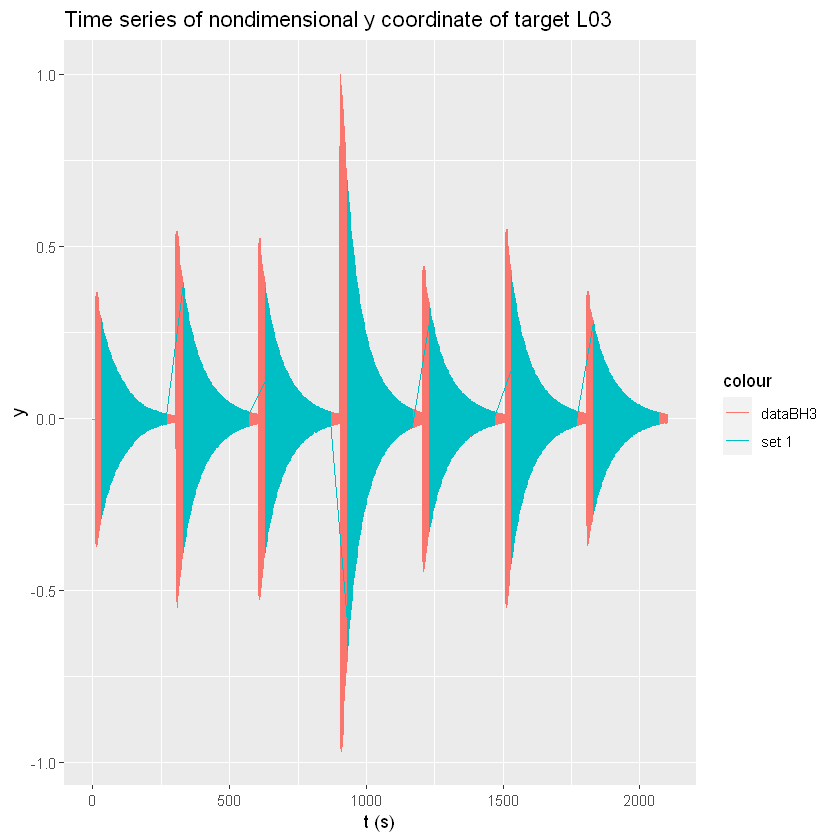

In [26]:
ggplot() + 
  geom_line(aes(x = dataBH3$Time, y = dataBH3$L03.Y, color = "dataBH3"), linewidth = 0.05) + 
  geom_line(aes(x = dataBH3$Time[subsets.all], y = dataBH3$L03.Y[subsets.all], color = "set 1"), linewidth = 0.08) +
  labs(x = "t (s)", y = "y", title = "Time series of nondimensional y coordinate of target L03")

$\mu$ máximo a ser avaliado:

In [27]:
mu.max <- 10

## Parte I: PCR

In [28]:
MSEs <- matrix(, nrow = 0, ncol = 7)
for (mu in 1:mu.max) {
  MSEs.mu <- c()
  for (i in 1:7) {
    TrSet <- subsets.all[!subsets.all %in% subsets[[i]]]
    TsSet <- subsets[[i]]

    Ut <- as.matrix(cbind(dataBH3[TrSet, !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[TrSet + 1, !colnames(dataBH3) %in% c("Frame", "Time")]))
    K <- (t(Ut)%*%Ut)/length(TrSet)
    rm(Ut)
    evp.K <- eigen(K)

    ROM.PCA.L03.Y <- lm(dataBH3[TsSet + frames.forward, "L03.Y"] ~ as.matrix(cbind(dataBH3[TsSet, !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[TsSet + 1, !colnames(dataBH3) %in% c("Frame", "Time")]))%*%as.matrix(evp.K$vectors[, 1:mu]))

    MSE <- mean((dataBH3[TsSet + frames.forward, "L03.Y"] - predict(ROM.PCA.L03.Y))^2)

    MSEs.mu <- c(MSEs.mu, MSE)
  }
  MSEs <- rbind(MSEs, t(MSEs.mu))
}

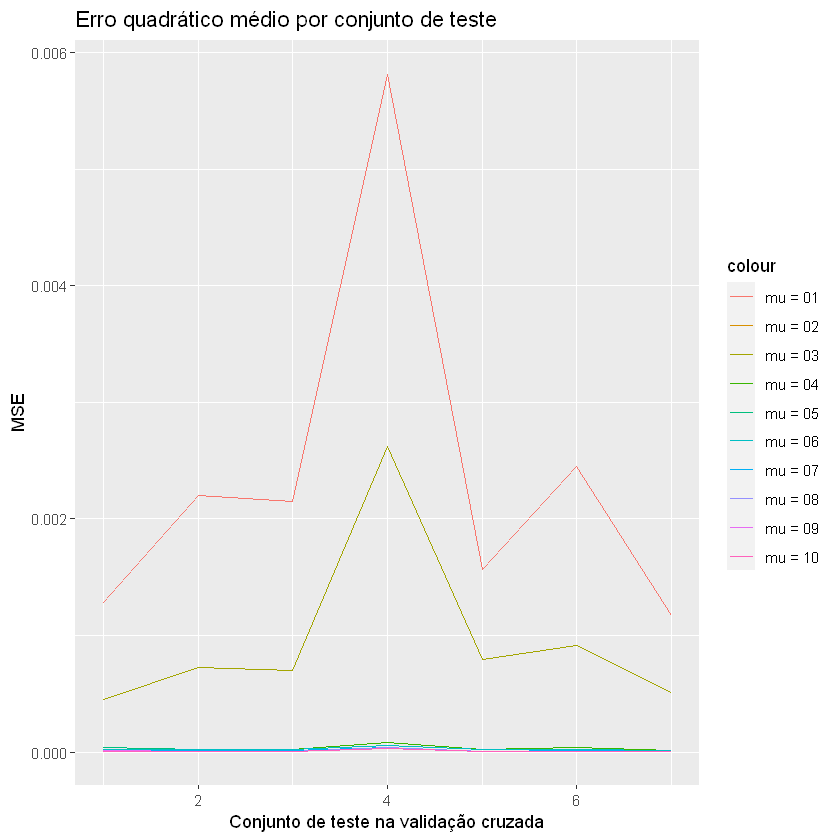

In [29]:
ggplot() + 
  geom_line(aes(x = 1:7, y = MSEs[1,], color = "mu = 01"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[2,], color = "mu = 02"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[3,], color = "mu = 03"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[4,], color = "mu = 04"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[5,], color = "mu = 05"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[6,], color = "mu = 06"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[7,], color = "mu = 07"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[8,], color = "mu = 08"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[9,], color = "mu = 09"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[10,], color = "mu = 10"), linewidth = 0.5) +
  labs(x = "Conjunto de teste na validação cruzada", y = "MSE", title = "Erro quadrático médio por conjunto de teste")

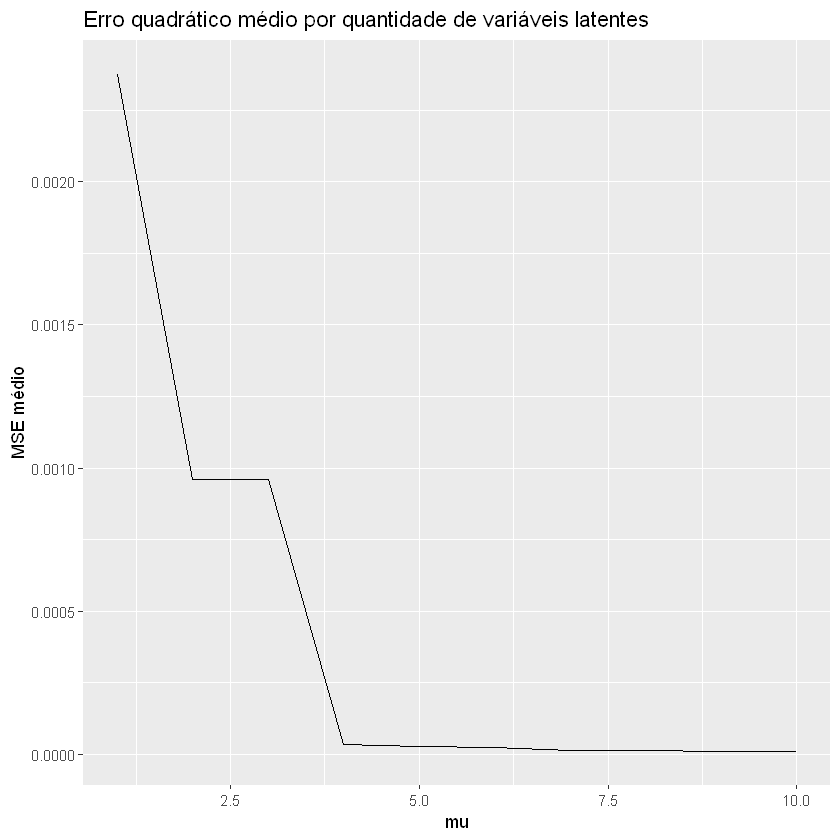

In [30]:
ggplot() + 
  geom_line(aes(x = 1:10, y = rowMeans(MSEs)), linewidth = 0.5) +
  labs(x = "mu", y = "MSE médio", title = "Erro quadrático médio por quantidade de variáveis latentes")

Constata-se que o $\mu$ ótimo é $4$, uma vez que para $\mu \geq 4$, tem se uma média dos MSEs aproximadamente estacionária.

In [31]:
l.eb <- c(1.8751, 4.69409, 7.85476, 10.9955, 14.1372)
EulerBernoulli <- function(i, s){
  cosh(s*l.eb[i]) - cos(s*l.eb[i]) - (sinh(l.eb[i]) - sin(l.eb[i])) / (cosh(l.eb[i]) + cos(l.eb[i])) * (sinh(s*l.eb[i]) - sin(s*l.eb[i]))
}

## Parte II: PLSR

In [32]:
MSEs <- matrix(, nrow = mu.max, ncol = 0)
for (i in 1:7) {
  TrSet <- subsets.all[!subsets.all %in% subsets[[i]]]
  TsSet <- subsets[[i]]

  Ut <- as.matrix(cbind(dataBH3[TrSet, !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[TrSet + 1, !colnames(dataBH3) %in% c("Frame", "Time")]))
  St <- as.matrix(dataBH3[TrSet + frames.forward, !colnames(dataBH3) %in% c("Frame", "Time")])
  K <- (t(Ut)%*%Ut)/length(TrSet)
  C <- (t(Ut)%*%St)/length(TrSet)
  rm(Ut, St)
  R_0 <- sum(diag(K))

  m <- dim(C)[1]
  l <- dim(C)[2]
  P <- matrix(nrow = m, ncol = mu.max)
  Q <- matrix(nrow = l, ncol = mu.max)
  V_1 <- matrix(nrow = m, ncol = mu.max)
  kp <- vector(length = mu.max)

  for (k in 1:mu.max){
    V_1[,k] <- svd(C)$u[,1]
    g <- 1 / (V_1[,k] %*% K %*% V_1[,k])
    P[,k] <- g[1] * K %*% V_1[,k]
    Q[,k] <- g[1] * t(C) %*% V_1[,k]
    K[,] <- K[,] - P[,k] %*% t(V_1[,k]) %*% K[,]
    C[,] <- C[,] - P[,k] %*% t(V_1[,k]) %*% C[,]
    kp[k] <- sum(diag(K))/R_0
  }

  U <- t(as.matrix(cbind(dataBH3[TsSet, !colnames(dataBH3) %in% c("Frame", "Time")], dataBH3[TsSet + 1, !colnames(dataBH3) %in% c("Frame", "Time")])))
  S <- t(as.matrix(dataBH3[TsSet + frames.forward, !colnames(dataBH3) %in% c("Frame", "Time")]))
  Z <- matrix(nrow = mu.max, ncol = length(TsSet))

  ROM.myPLSR.L03.Y <- S[l,]
  MSE <- mean((ROM.myPLSR.L03.Y)^2)
  MSEs.tsSet <- c(MSE)

  for (k in 1:(mu.max - 1)) {
    Z[k,] <- t(V_1[,k]) %*% U
    U[,] <- U[,] - P[,k] %*% t(Z[k,])
    S[,] <- S[,] - Q[,k] %*% t(Z[k,])
    ROM.myPLSR.L03.Y <- S[l,]
    MSE <- mean((ROM.myPLSR.L03.Y)^2)
    MSEs.tsSet <- c(MSEs.tsSet, MSE)
  }

  MSEs <- cbind(MSEs, MSEs.tsSet)
}

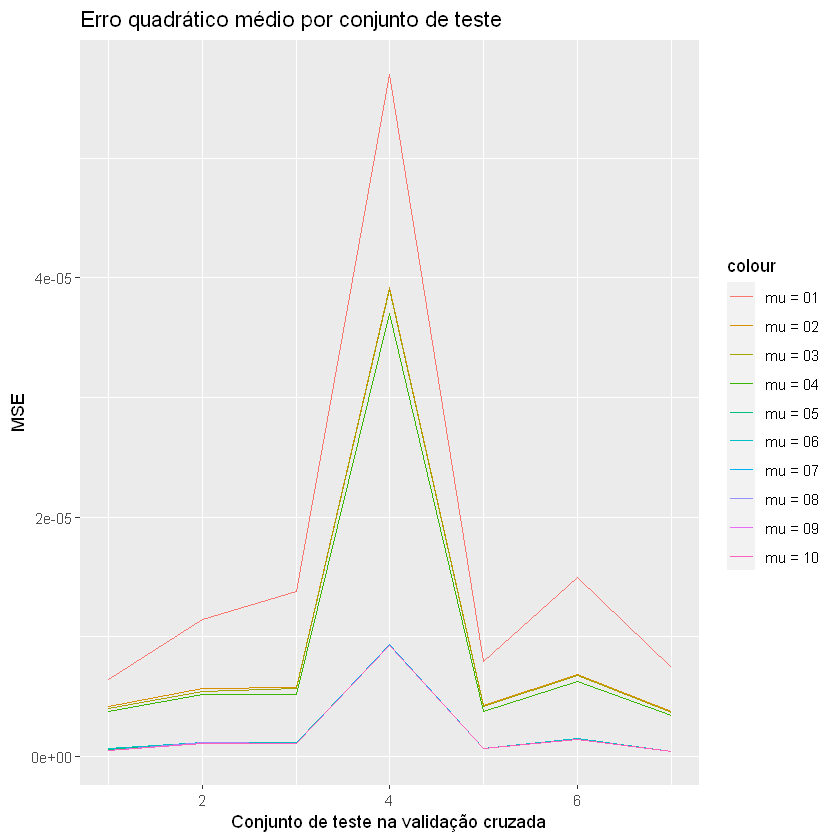

In [33]:
ggplot() + 
  geom_line(aes(x = 1:7, y = MSEs[1,], color = "mu = 01"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[2,], color = "mu = 02"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[3,], color = "mu = 03"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[4,], color = "mu = 04"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[5,], color = "mu = 05"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[6,], color = "mu = 06"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[7,], color = "mu = 07"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[8,], color = "mu = 08"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[9,], color = "mu = 09"), linewidth = 0.5) +
  geom_line(aes(x = 1:7, y = MSEs[10,], color = "mu = 10"), linewidth = 0.5) +
  labs(x = "Conjunto de teste na validação cruzada", y = "MSE", title = "Erro quadrático médio por conjunto de teste")

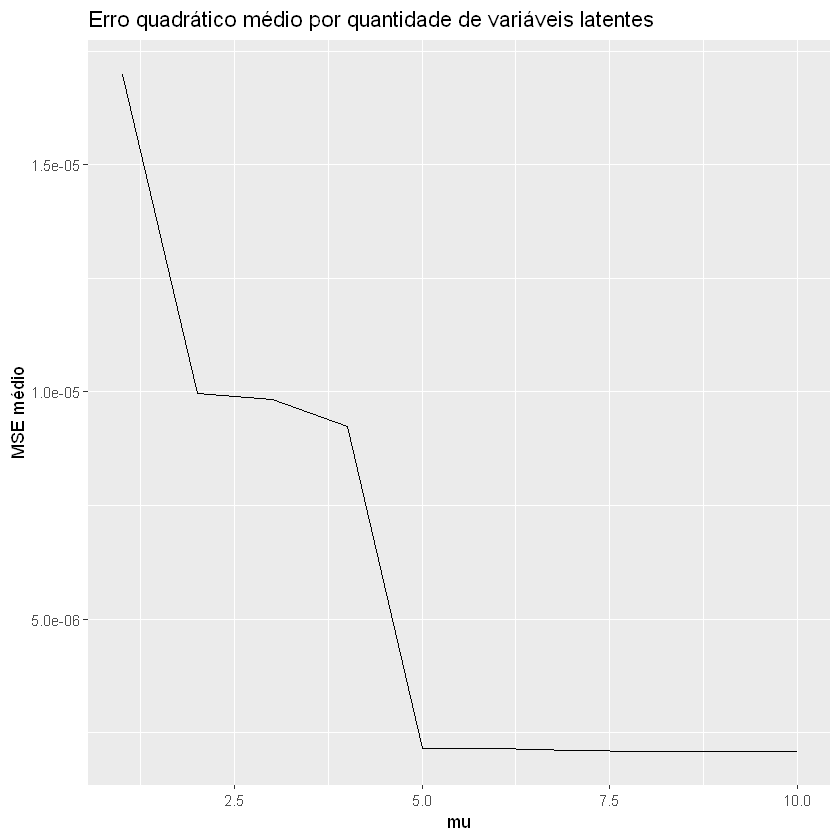

In [34]:
ggplot() + 
  geom_line(aes(x = 1:10, y = rowMeans(MSEs)), linewidth = 0.5) +
  labs(x = "mu", y = "MSE médio", title = "Erro quadrático médio por quantidade de variáveis latentes")

Constata-se que o $\mu$ ótimo é $5$, uma vez que para $\mu \geq 5$, tem se uma média dos MSEs aproximadamente estacionária.

Pelos resultados, conseguiu-se um modelo com menor MSE médio, ao longo da validação cruzada, pelo método de PLSR.